In [373]:
import xml.etree.ElementTree as ET
from pandas import DataFrame
import pandas as pd
import os
import numpy

In [374]:
#A founction that makes the certain metadata in each agreement into a list

def rawmaker(file):
    tree = ET.parse(file)
    root = tree.getroot()
    
    list = []
    for meta in root.findall('meta'):
        name = meta.find('name').text
        ttype = meta.find('type').text
        date_signed = meta.find('date_signed').text
        composition = meta.find('composition').text
        region= meta.find('region').text
        crossregional = meta.find('crossregional').text
        
        list = [name,ttype,date_signed,composition,region,crossregional]
        arr = list
    
    return(arr)
    
#rawmaker('pta_1.xml')

In [375]:
rootdir = 'xml'
list = os.listdir(rootdir) #Listing all directories and files under the folder
df = pd.DataFrame(columns = ['name','type','date signed','composition','region','crossregional'])
#df
for i in range(0,len(list)):                # reading path of each agreement one by one 
    path = os.path.join(rootdir,list[i])
    #print(path)
    if os.path.isfile(path):
        raw = pd.DataFrame(rawmaker(path)).T
    raw.columns = df.columns
    df = pd.concat([df,raw],ignore_index = True) 
#df
df.head()
        

,name,type,date signed,composition,region,crossregional
0,Japan - Thailand,Free Trade Agreement & Economic Integration Ag...,2007-04-03,Bilateral,East Asia,No
1,Panama - Singapore,Free Trade Agreement & Economic Integration Ag...,2006-03-01,Bilateral,Central America; East Asia,Yes
2,EU - Andorra,Customs Union,1991-06-28,Bilateral; One Party is an RTA,Europe,No
3,Canada - Chile,Free Trade Agreement & Economic Integration Ag...,1996-12-05,Bilateral,North America; South America,Yes
4,EU - Palestinian Authority,Free Trade Agreement,1997-02-24,Bilateral; One Party is an RTA,Europe; Middle East,Yes


In [377]:
df.shape[0]

451

In [378]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set()

Free Trade Agreement ->FTA 
 Free Trade Agreement & Economic Integration Agreement ->FTA&EIA 
 Customs Union ->CU 
 Partial Scope Agreement ->PSA 
 Customs Union & Economic Integration Agreement ->CU&EIA 
 Economic Integration Agreement ->EIA 



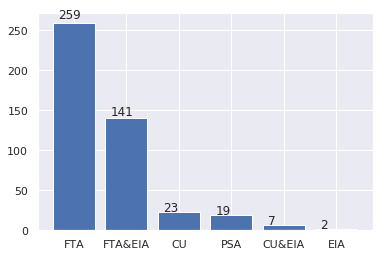

In [379]:
#1.List all trade agreement types in the data and count the frequency of each type

list = df['type'].value_counts()  
#print(list)
tp = list.index

#Prevents overlape of characters in the x axis
print(tp[0],'->FTA','\n',tp[1],'->FTA&EIA','\n',tp[2],'->CU','\n',
      tp[3],'->PSA','\n',tp[4],'->CU&EIA','\n',tp[5],'->EIA','\n') 
#tp = ['FTA','FTA&EIA','CU','PSA','CU&EIA','EIA']

frequency = list.values
#print(frequency)

fig=plt.figure()
ax1=plt.subplot(111)
x_bar=np.arange(6)
ax1.set_xticklabels(('FTA','FTA&EIA','CU','PSA','CU&EIA','EIA'))
rect=ax1.bar(x_bar,height=frequency)

for rec in rect:
    a=rec.get_x()
    height=rec.get_height()
    ax1.text(a+0.1,1.02*height,str(height))
ax1.set_xticks(x_bar)

plt.show()


Explanation1

The most common types and the rarest types of trade can be clearly seen in this chart. Although only two EIA agreements have been signed in the past 70 years, the number of agreements with both EIA and FTA features has increased significantly.

Text(0.5,1,'Trends in the number of agreements signed')

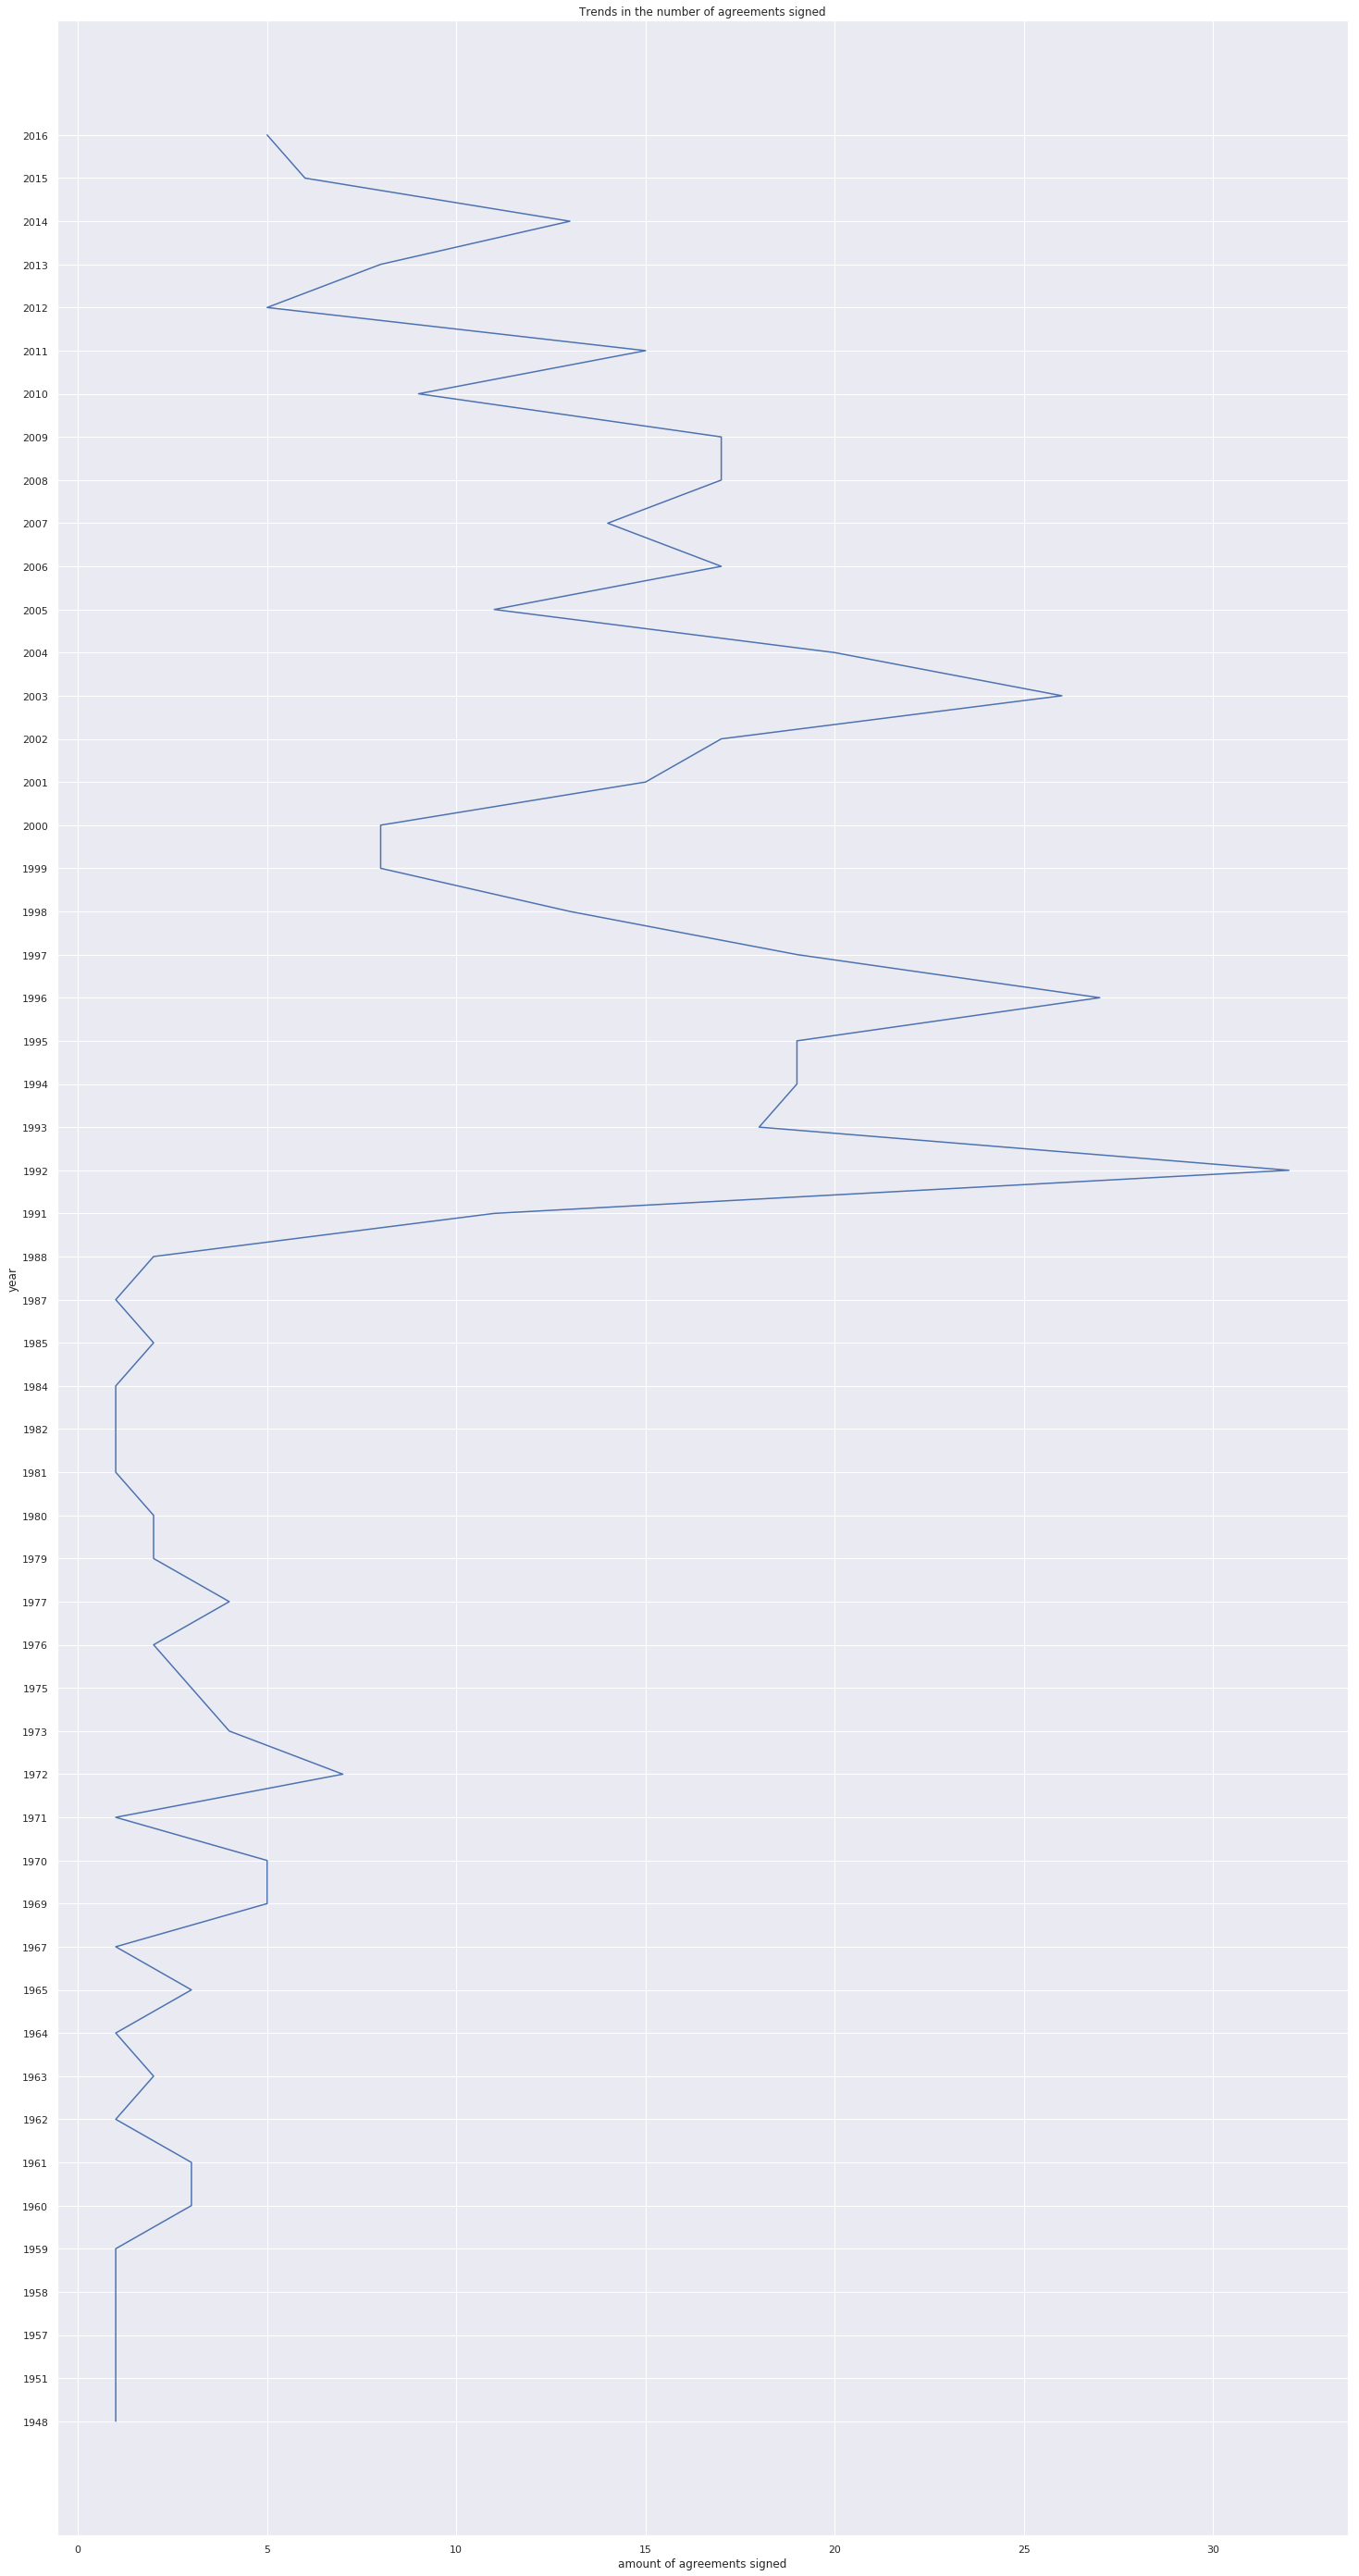

In [380]:
#2.Analyzing the yearly trend of the number of agreements signed

date = df['date signed']

#Delete date to facilitate statistics by year
i = 0
for dat in date:
    df.loc[i,'date signed'] = dat[0:4] 
    i +=1
#df

signedyear = df['date signed'].value_counts()
signedyear = signedyear.sort_index() #To analyze the yearly trend so that put the years in ascending order
#signedyear
year = signedyear.index
quantity = signedyear.values

plt.figure(figsize = (25,50))  
plt.plot(quantity,year)  
plt.xlabel('amount of agreements signed')  
plt.ylabel('year')  
plt.title("Trends in the number of agreements signed") 


Explanation2

The number of trade agreements has risen abruptly since 1988, and reaching a peak in 1992, 1996 and 2003 respectively. Interestingly, since the 2008 financial crisis, the general trend in the number of trade deals has been downward. By 2016, the number of deals had even returned to the same level as in the 1970s.

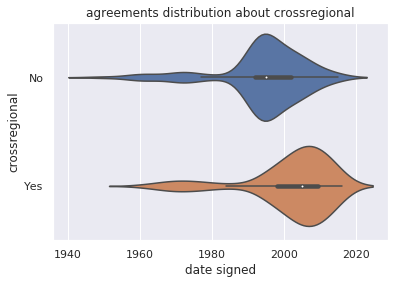

In [381]:
#3.Analyzing the distribution of the crossregional and uncrossregional trade agreements in more than half a century

#Converts the string type of the year to a numeric type
df['date signed'] = df['date signed'].apply(pd.to_numeric)
#df
#type(df['date signed'][0])

chart3 = sns.violinplot(x='date signed', y='crossregional', data=df)
chart3.set_title('agreements distribution about crossregional')
plt.show()
    

Explanation3

As can be seen from the chart, crossregional agreements did not appear until the 1950s, and began to increase substantially around 1990s. Moreover, the number of crossregional agreements is significantly higher than that of non-crossregional agreements in the period from 2000 to 2016. Thus, it can be speculated that crossregional international trade agreements may become a more popular form of trade for some time to come.

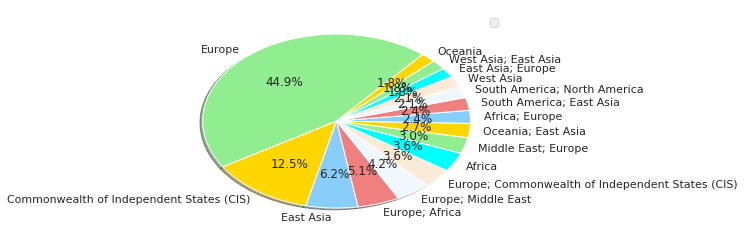

In [382]:
#4.The region that generates relatively large amounts of trade agreements and their propotion

regi = df['region'].value_counts()
#regi
#regi[0:10]

#extracting the regions with more than 10 points of trade agreements signed between 1948 and 2016
for i in range(len(regi)):
    if regi.values[i] < 6:
        break
s_reg = regi[0:i]
#s_reg

data={'regions':s_reg.index,'amounts':s_reg.values}   
df_R=DataFrame(data) 
df_R

labels=df_R['regions']
plt.legend(labels)
sizes=df_R['amounts']
colors='lightgreen','gold','lightskyblue','lightcoral','aliceblue','antiquewhite','aqua',
'aquamarine','azure','beige','bisque','blanchedalmond','blue','blueviolet'  
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=50)
plt.show()
        

Explanation4

I want to use a pie chart like this to show some regions in the data where the frequency of signing agreements is relatively high, and to show the regions with active trade by the intuitive proportion. I think it might be helpful to look at some trade situations.

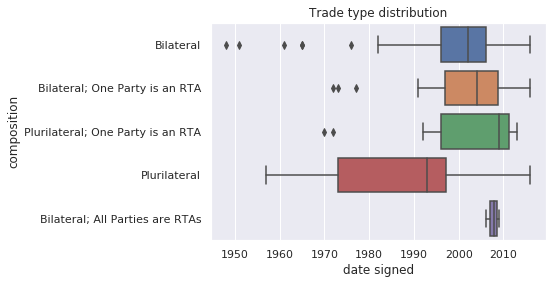

In [383]:
#5.distribution of trade agreements type

chart5 = sns.boxplot(x='date signed', y='composition', data=df)
chart5.set_title('Trade type distribution')
plt.show()

Explanation5

It is surprising to find that the bilateral and plurilateral types of trade agreements have evolved over time. It can be seen that plurilateral trade is the most traditional and lasting type of trade. However, with the development of regional economic cooperation in the main form of RTA, the pure plurilateral trade gradually fades out of the trade cooperation type at the beginning of 2000, which may indicate that more and more countries start to follow RTA.As for the outliers, I suspect they may have been early exploratory decisions in some countries and regions before RTA became a major trend.

Reflection

I feel that doing data visualization is just like a journalist doing data journalism, which requires rich humanistic knowledge and skilled statistical skills. But the difference is that journalists generally can't use code to analyze and visualize. Therefore, in the process of completing this assignment, in addition to being more familiar with some datafrme processing methods and python plot library, I also learned some contents about XML data structure and some basic knowledge about international trade mentioned in the data. As for the data itself, because I only analyzed the detadata section of the XML data, there are a lot of relative relationships and noteworthy points that need the support of text analysis, which is done by two of my other partners. But I still posed some hypothesise in the explanation of each chart. The data analysis of this assignment is related to the development of the world economy and international law since the international trade is closely based on the laws and world economy. So, I'm looking forward to the final visual result.